# Kernel SVM
## Usare i kernel per individuare relazioni non lineari
Le macchine a vettori di supporto sono un modello linerare, quindi falliscono nel trovare relazioni non lineari all'interno dei dati.<br>
Questa limitazione può essere superata utilizzando una **funzione kernel**.
<br><br>
In questo notebook testeremo diverse funzioni kernel per classificare un toy-dataset contenente due features legate da una relazione non linere.<br><br>
Importiamo le librerie necessarie.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scripts.viz import plot_bounds

Per creare il dateset possiamo utilizzare il metodo <span style="font-family: Monaco">make-circle</span>
 di scikit-learn, questo ritornerà features e target già sotto forma di array numpy.

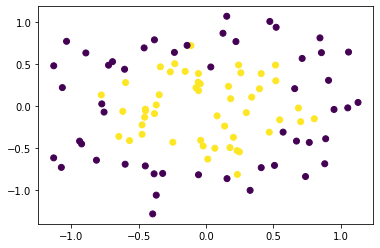

In [2]:
from sklearn.datasets import make_circles

X, y = make_circles(noise=0.2, factor=0.5, random_state=1)
plt.scatter(X[:,0],X[:,1],c=y)

Adesso creiamo gli array l'addestramento ed il test

In [3]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## Diversi tipi di funzioni kernel
Per creare una SVM che si serve di una funzione Kernel possiamo usare la classe SVC di scikit-learn, specificando il tipo di funzione kernel all'interno del parametro <span style="font-family: Monaco">kernel</span>

### Kernel lineare
Il kernel lineare corrisponde ad una semplice SVM lineare

ACCURACY: Train=0.5143 Test=0.4667


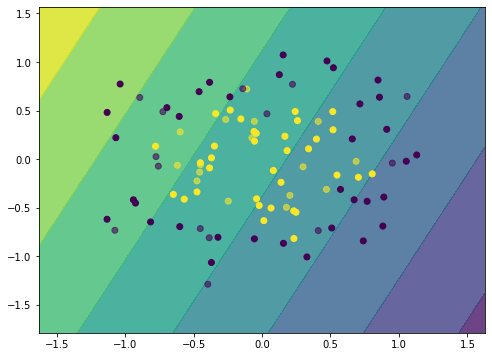

In [4]:
from sklearn.svm import SVC

svc = SVC(kernel="linear",probability=True) #equivale alla classe LinearSVC
svc.fit(X_train, Y_train)
print("ACCURACY: Train=%.4f Test=%.4f" % (svc.score(X_train, Y_train), svc.score(X_test,Y_test)))
plot_bounds((X_train, X_test),(Y_train, Y_test),svc)

**NOTA BENE** Una SVM non calola direttamente la probabilità dell'accuratezza della predizione, è possibile farlo comunque specificando il parametro probability=True, questo rallenterà, anche di molto, sia la fase di addestramento sia le predizioni.

### Kernel gaussiano (RBF)
Il kernel gaussiano è il kernel generico più utilizzato ed è quello da utilizzare se non si sa come muoversi.

ACCURACY: Train=0.9143 Test=0.8667


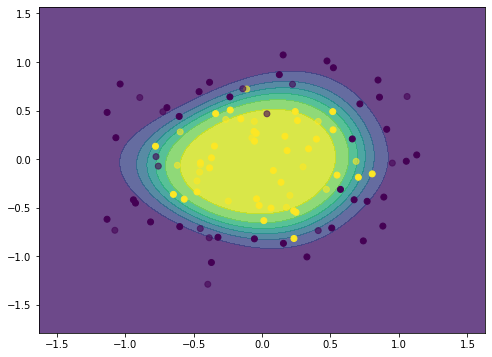

In [8]:
from sklearn.svm import SVC

svc = SVC(kernel="rbf",probability=True)
svc.fit(X_train, Y_train)
print("ACCURACY: Train=%.4f Test=%.4f" % (svc.score(X_train, Y_train), svc.score(X_test,Y_test)))
plot_bounds((X_train, X_test),(Y_train, Y_test),svc)

### Kernel sigmoidale
Kernel alternativo che vale la pena provare se RBF non fornisce risultati soddisfacenti (non è questo il caso)

ACCURACY: Train=0.4714 Test=0.4333


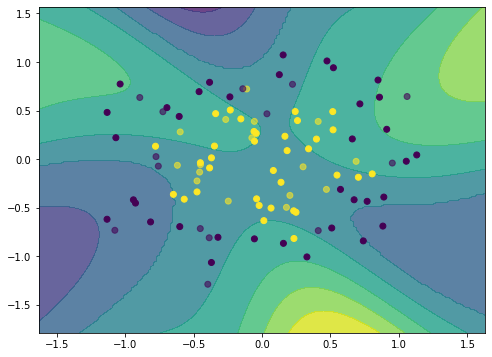

In [6]:
from sklearn.svm import SVC

svc = SVC(kernel="sigmoid",probability=True) #equivale alla classe LinearSVC
svc.fit(X_train, Y_train)
print("ACCURACY: Train=%.4f Test=%.4f" % (svc.score(X_train, Y_train), svc.score(X_test,Y_test)))
plot_bounds((X_train, X_test),(Y_train, Y_test),svc)

### Kernel polinomiale
Altro kernel alternativo che vale la pena provare se RBF non fornisce risultati soddisfacenti (continua a non essere questo il caso)

ACCURACY: Train=0.5143 Test=0.4667


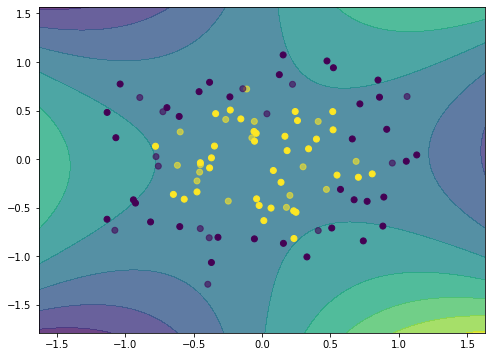

In [7]:
from sklearn.svm import SVC

svc = SVC(kernel="poly",probability=True) #equivale alla classe LinearSVC
svc.fit(X_train, Y_train)
print("ACCURACY: Train=%.4f Test=%.4f" % (svc.score(X_train, Y_train), svc.score(X_test, Y_test)))
plot_bounds((X_train, X_test),(Y_train, Y_test),svc)